<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Orbital_tumor_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Orbital tumor**

In [1]:
# prompt: gdriveをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=07b033d4b9f7c34785c712ddd7340b0e03a2e003351a26c653e67b978c0259da
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd

# Load the CSV file with shift-jis encoding
file_path = "/content/drive/MyDrive/発表/2024近畿神経眼科セミナー/merged_patient_data.csv"
data = pd.read_csv(file_path, encoding='shift-jis')

# Define the categories and their corresponding keywords without numbers in parentheses
categories = {
    '炎症性疾患': [
        'Inflammation', 'myositis', 'GPA', 'Sarcoidosis'
    ],
    'リンパ性疾患': [
        'IgG4-ROD', 'MALT lymphoma', 'Diffuse large B-cell lymphoma',
        'Follicular lymphoma', 'Indolent lymphoma', 'Reactive lymphoid hyperplasia',
        'NKT lymphoma', 'Malignant lymphoma'
    ],
    '嚢胞': [
        'Dermoid', 'Dacriops', 'Cyst', 'Epidermal cyst'
    ],
    '上皮性腫瘍': [
        'Pleomorphic adenoma', 'Adenoid cystic carcinoma', 'Squamous cell carcinoma',
        'Sebaceous gland carcinoma', 'Carcinoma ex pleomorphic adenoma', 'Sebaceous gland carcinomas'
    ],
    '非上皮性良性腫瘍': [
        'Cavenous hemangioma', 'Schwannoma', 'Lipoma', 'Neurofibroma'
    ],
    '非上皮性悪性腫瘍': [
        'Metastatic', 'Malignant melanoma', 'Sarcoma', 'Ewing', 'Clear cell sarcoma',
        'well-differentiated liposarcoma', 'Sebaceous gland carcinoma'
    ],
    '血管性病変': [
        'Lymphatic malfomation', 'Venous malformation', 'Infantile hemangioma',
        'Lymphatic malformation'
    ],
    '眼窩外からの進展': [
        'Osteoma', 'Paranasal sinus carcinoma', 'Paranasal sinus cyst',
        'Paranasal sinus SCC', 'Paranasal sinus adenoid cystic carcinoma',
        'Paranasal sinus melanoma', 'Fibrous dysplasia', 'Parasinus sinus carcinoma'
    ],
    'その他': [
        'Orbital abscess', 'Foreign body granuloma', 'Amyloidosis', 'Multiple myeloma',
        'Optic meningioma', 'Meningioma', 'Swollen MiraGel', 'Xanthogranuloma', 'CCF',
        'Jugular venous reflux syndrome', 'Venous thrombosis', 'Hystiocytosis', 'Hematoma',
        'Optic glioma', 'Fibrous lesion'
    ]
}

# Create a function to categorize each row based on the '概要' column
def categorize_row(row):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in row.lower():
                return category
    return '分類なし'

# Apply the function to the '概要' column
data['分類'] = data['概要'].apply(categorize_row)

# Check for rows that are not categorized
uncategorized = data[data['分類'] == '分類なし']

data

In [ ]:
# Extract the year from the '病名開始日_1' column
data['年度'] = pd.to_datetime(data['病名開始日_1'], errors='coerce').dt.year

# Group by year and count the number of cases
yearly_counts = data['年度'].value_counts().sort_index()

# Convert the yearly counts to a DataFrame
yearly_counts_df = yearly_counts.reset_index()
yearly_counts_df.columns = ['年度', '症例数']

# Plot the yearly counts
plt.figure(figsize=(12, 8))
sns.barplot(x='年度', y='症例数', data=yearly_counts_df)
plt.xticks(rotation=45, ha='right')
plt.title('年度別の症例数')
plt.xlabel('年度')
plt.ylabel('症例数')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categories and their keywords
categories = {
    '炎症性疾患': ['Inflammation', 'myositis', 'GPA', 'Sarcoidosis'],
    'リンパ性疾患': ['IgG4-ROD', 'MALT lymphoma', 'Diffuse large B-cell lymphoma',
                 'Follicular lymphoma', 'Indolent lymphoma', 'Reactive lymphoid hyperplasia',
                 'NKT lymphoma', 'Malignant lymphoma'],
    '嚢胞': ['Dermoid', 'Dacriops', 'Cyst', 'Epidermal cyst'],
    '上皮性腫瘍': ['Pleomorphic adenoma', 'Adenoid cystic carcinoma', 'Squamous cell carcinoma',
                'Sebaceous gland carcinoma', 'Carcinoma ex pleomorphic adenoma', 'Sebaceous gland carcinomas'],
    '非上皮性良性腫瘍': ['Cavenous hemangioma', 'Schwannoma', 'Lipoma', 'Neurofibroma'],
    '非上皮性悪性腫瘍': ['Metastatic', 'Malignant melanoma', 'Sarcoma', 'Ewing', 'Clear cell sarcoma',
                     'well-differentiated liposarcoma', 'Sebaceous gland carcinoma'],
    '血管性病変': ['Lymphatic malfomation', 'Venous malformation', 'Infantile hemangioma',
                'Lymphatic malformation'],
    '眼窩外からの進展': ['Osteoma', 'Paranasal sinus carcinoma', 'Paranasal sinus cyst',
                    'Paranasal sinus SCC', 'Paranasal sinus adenoid cystic carcinoma',
                    'Paranasal sinus melanoma', 'Fibrous dysplasia', 'Parasinus sinus carcinoma'],
    'その他': ['Orbital abscess', 'Foreign body granuloma', 'Amyloidosis', 'Multiple myeloma',
            'Optic meningioma', 'Meningioma', 'Swollen MiraGel', 'Xanthogranuloma', 'CCF',
            'Jugular venous reflux syndrome', 'Venous thrombosis', 'Hystiocytosis', 'Hematoma',
            'Optic glioma', 'Fibrous lesion']
}

# Initialize a dictionary to count the number of cases in each category
category_counts = {key: 0 for key in categories.keys()}

# Classify each diagnosis and count the occurrences in each category
for diagnosis in data['概要'].dropna():
    classified = False
    for category, keywords in categories.items():
        if any(keyword in diagnosis for keyword in keywords):
            category_counts[category] += 1
            classified = True
            break
    if not classified:
        category_counts['その他'] += 1

# Convert the category counts to a DataFrame
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

# Sort the DataFrame by the count and move 'その他' to the end
category_counts_df_sorted = category_counts_df[category_counts_df['Category'] != 'その他'].sort_values(by='Count', ascending=False)
category_counts_df_sorted = pd.concat([category_counts_df_sorted, category_counts_df[category_counts_df['Category'] == 'その他']])

# Set the font size and other style parameters
plt.rcParams.update({'font.size': 14, 'figure.figsize': (12, 8)})

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Count', data=category_counts_df_sorted)
plt.xticks(rotation=45, ha='right')
plt.title('カテゴリーごとの症例数（ソート済み）')
plt.xlabel('カテゴリー')
plt.ylabel('症例数')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the categories and their keywords
categories = {
    '炎症性疾患': ['Inflammation', 'myositis', 'GPA', 'Sarcoidosis'],
    'リンパ性疾患': ['IgG4-ROD', 'MALT lymphoma', 'Diffuse large B-cell lymphoma',
                 'Follicular lymphoma', 'Indolent lymphoma', 'Reactive lymphoid hyperplasia',
                 'NKT lymphoma', 'Malignant lymphoma'],
    '嚢胞': ['Dermoid', 'Dacriops', 'Cyst', 'Epidermal cyst'],
    '上皮性腫瘍': ['Pleomorphic adenoma', 'Adenoid cystic carcinoma', 'Squamous cell carcinoma',
                'Sebaceous gland carcinoma', 'Carcinoma ex pleomorphic adenoma', 'Sebaceous gland carcinomas'],
    '非上皮性良性腫瘍': ['Cavenous hemangioma', 'Schwannoma', 'Lipoma', 'Neurofibroma'],
    '非上皮性悪性腫瘍': ['Metastatic', 'Malignant melanoma', 'Sarcoma', 'Ewing', 'Clear cell sarcoma',
                     'well-differentiated liposarcoma', 'Sebaceous gland carcinoma'],
    '血管性病変': ['Lymphatic malfomation', 'Venous malformation', 'Infantile hemangioma',
                'Lymphatic malformation'],
    '眼窩外からの進展': ['Osteoma', 'Paranasal sinus carcinoma', 'Paranasal sinus cyst',
                    'Paranasal sinus SCC', 'Paranasal sinus adenoid cystic carcinoma',
                    'Paranasal sinus melanoma', 'Fibrous dysplasia', 'Parasinus sinus carcinoma'],
    'その他': ['Orbital abscess', 'Foreign body granuloma', 'Amyloidosis', 'Multiple myeloma',
            'Optic meningioma', 'Meningioma', 'Swollen MiraGel', 'Xanthogranuloma', 'CCF',
            'Jugular venous reflux syndrome', 'Venous thrombosis', 'Hystiocytosis', 'Hematoma',
            'Optic glioma', 'Fibrous lesion']
}

# Create a new column to indicate if there is a pathological diagnosis
data['病理診断あり'] = data['病理診断'].apply(lambda x: 'あり' if x == 'あり' else 'なし')

# Initialize a dictionary to count the number of cases in each category with subcategories for pathological diagnosis
category_counts_detailed = {key: {'あり': 0, 'なし': 0} for key in categories.keys()}

# Classify each diagnosis from the '概要' column and count the occurrences in each category with pathological diagnosis subcategories
for index, row in data.iterrows():
    diagnosis = row['概要']
    pathology = row['病理診断あり']
    if pd.notna(diagnosis):
        classified = False
        for category, keywords in categories.items():
            if any(keyword in diagnosis for keyword in keywords):
                category_counts_detailed[category][pathology] += 1
                classified = True
                break
        if not classified:
            category_counts_detailed['その他'][pathology] += 1

# Convert the detailed category counts to a DataFrame
category_counts_detailed_df = pd.DataFrame(category_counts_detailed).T
category_counts_detailed_df.reset_index(inplace=True)
category_counts_detailed_df.columns = ['Category', '病理診断あり', '病理診断なし']

# Sum the counts for each category to sort by the total count
category_counts_detailed_df['Total'] = category_counts_detailed_df['病理診断あり'] + category_counts_detailed_df['病理診断なし']

# Sort by total count excluding 'その他'
sorted_df = category_counts_detailed_df[category_counts_detailed_df['Category'] != 'その他'].sort_values(by='Total', ascending=False)

# Append 'その他' at the end
other_df = category_counts_detailed_df[category_counts_detailed_df['Category'] == 'その他']
sorted_df = pd.concat([sorted_df, other_df])

# Set the font size and other style parameters
plt.rcParams.update({'font.size': 14, 'figure.figsize': (12, 8)})

# Create the stacked bar plot
fig, ax = plt.subplots()
bottom_bar = ax.bar(sorted_df['Category'], sorted_df['病理診断あり'], color='blue', label='病理診断あり')
top_bar = ax.bar(sorted_df['Category'], sorted_df['病理診断なし'], bottom=sorted_df['病理診断あり'], color='orange', label='病理診断なし')

plt.xticks(rotation=45, ha='right')
plt.title('カテゴリーごとの症例数（病理診断の分類付き、ソート済み）')
plt.xlabel('カテゴリー')
plt.ylabel('症例数')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


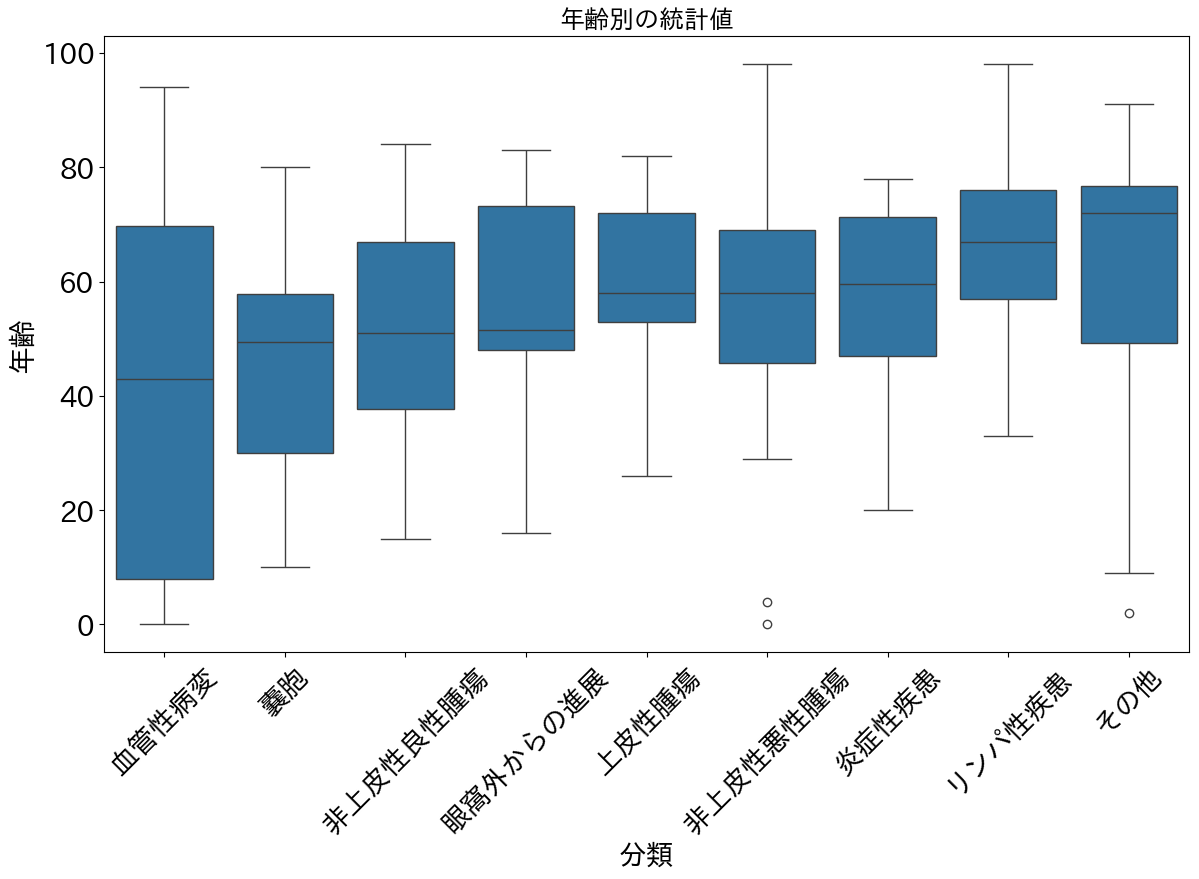

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Sort categories by the median age
median_ages = data.groupby('分類')['Age'].median().sort_values()
sorted_categories = median_ages.index.tolist()

# Set the font size
plt.rcParams.update({'font.size': 20})

# Create a box plot for Age based on the sorted categories using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='分類', y='Age', data=data, order=sorted_categories)
plt.title('年齢別の統計値', fontsize=18)
plt.xlabel('分類', fontsize= 20)
plt.ylabel('年齢', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()